<a href="https://colab.research.google.com/github/yongzhiqu/IE_4495/blob/master/CH05_SEC05_1_GaussianMixtureModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
from sklearn.mixture import GaussianMixture
import os
from mpl_toolkits import mplot3d

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


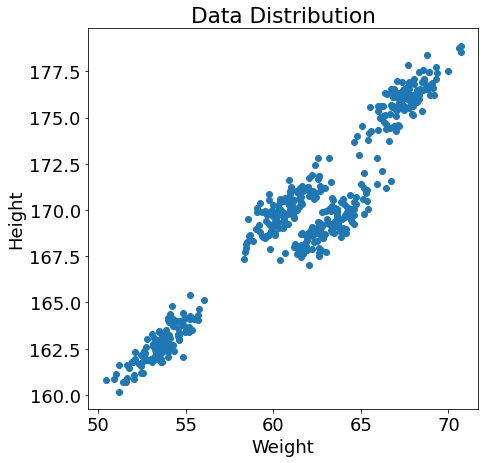

In [47]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/clustering_Data.csv')

plt.figure(figsize=(7,7))
plt.scatter(data['Weight'],data['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
plt.show()

In [41]:
cluster_data = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/DATA/clustering_Data.csv', dtype = 'float', delimiter=',')

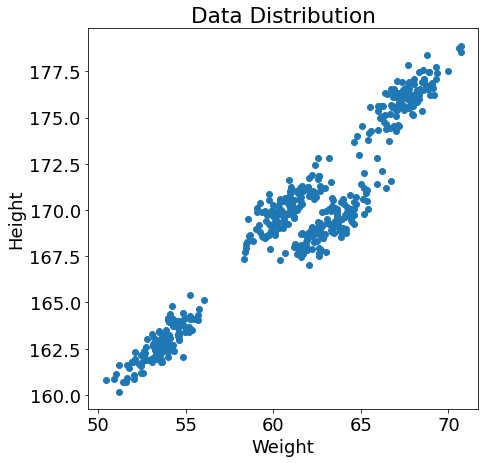

In [39]:
plt.figure(figsize=(7,7))
plt.scatter(cluster_data[:,0],cluster_data[:,1])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Data Distribution')
plt.show()

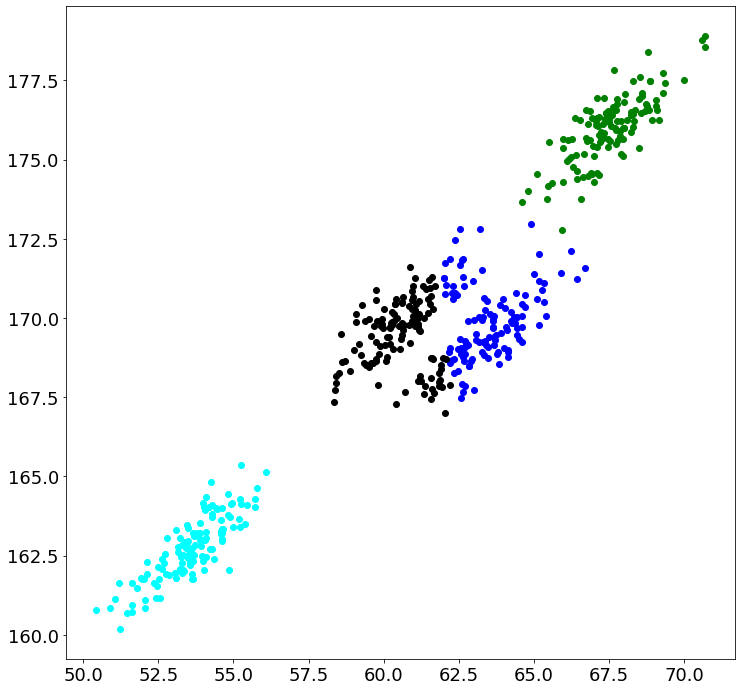

In [48]:
#Test k-means mothod
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

#predictions from kmeans
pred = kmeans.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = pred
frame.columns = ['Weight', 'Height', 'cluster']

#plotting results
color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()

[2 2 3 3 2 0 0 3 3 1 0 2 0 1 3 3 2 3 1 3 3 2 0 1 3 1 2 0 1 0 0 0 2 0 0 2 1
 3 1 2 1 3 3 2 0 2 3 3 2 2 1 1 0 3 3 0 0 1 1 2 2 1 2 2 2 0 3 2 3 0 1 3 1 2
 1 2 0 0 3 3 1 3 1 3 3 0 1 1 2 1 1 1 2 1 3 3 2 2 2 3 1 1 2 1 3 3 0 2 3 1 1
 0 1 1 2 1 2 3 0 2 3 1 2 2 1 2 2 2 2 1 3 1 0 1 1 1 3 2 3 0 2 2 2 2 0 1 3 3
 0 1 1 2 3 3 3 0 0 2 0 3 2 3 2 2 0 0 2 3 1 0 2 1 2 0 3 1 3 1 1 1 2 2 2 3 0
 1 0 2 0 1 2 0 1 0 0 1 3 0 3 1 1 3 0 0 3 0 0 3 0 0 0 2 2 2 3 2 0 1 1 1 3 2
 0 1 0 2 1 3 1 0 0 0 0 0 3 3 3 0 1 2 2 0 0 2 1 1 3 2 3 3 3 0 2 1 3 1 1 0 1
 0 3 3 2 1 2 2 3 3 1 2 3 1 2 0 2 1 0 0 3 2 2 3 2 0 2 0 0 2 3 3 3 2 1 1 2 1
 1 1 3 2 2 1 3 1 2 2 0 1 1 3 1 3 2 3 1 0 1 0 0 3 3 3 0 0 1 2 3 0 1 2 3 3 2
 2 0 2 0 0 3 0 1 2 2 3 2 3 2 2 2 2 3 2 3 2 3 3 1 2 3 1 1 0 3 2 2 0 0 2 0 1
 3 3 3 1 3 0 3 1 1 3 1 1 0 1 1 0 0 0 0 1 1 1 1 2 1 2 3 2 1 3 2 3 2 3 0 0 1
 3 1 0 3 2 1 0 3 2 1 0 0 3 2 3 2 0 2 3 2 1 0 2 1 2 3 0 3 0 2 1 3 3 0 2 2 3
 3 0 3 0 1 2 0 2 1 0 0 0 1 0 3 1 0 0 0 0 0 3 1 2 0 2 3 2 0 1 3 1 0 1 3 1 3
 0 0 1 0 0 0 1 2 0 0 1 3 

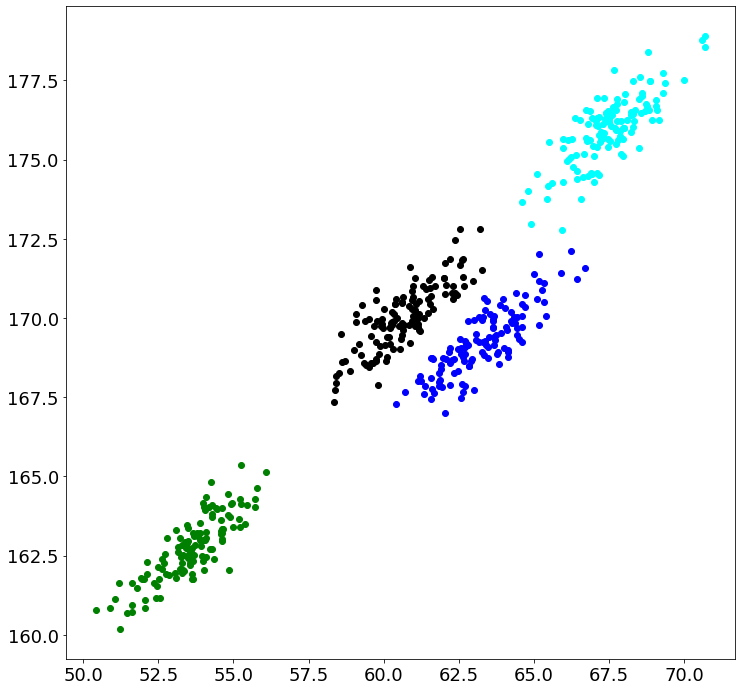

In [55]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/clustering_Data.csv')

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data)


#predictions from gmm
labels = gmm.predict(data)
print(labels)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()

In [16]:
dogdata_w_mat = io.loadmat(os.path.join('/content/drive/MyDrive/Colab Notebooks','DATA','dogData_w.mat'))
catdata_w_mat = io.loadmat(os.path.join('/content/drive/MyDrive/Colab Notebooks','DATA','catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']
print(dog_wave.shape)
print(cat_wave.shape)

(1024, 80)
(1024, 80)


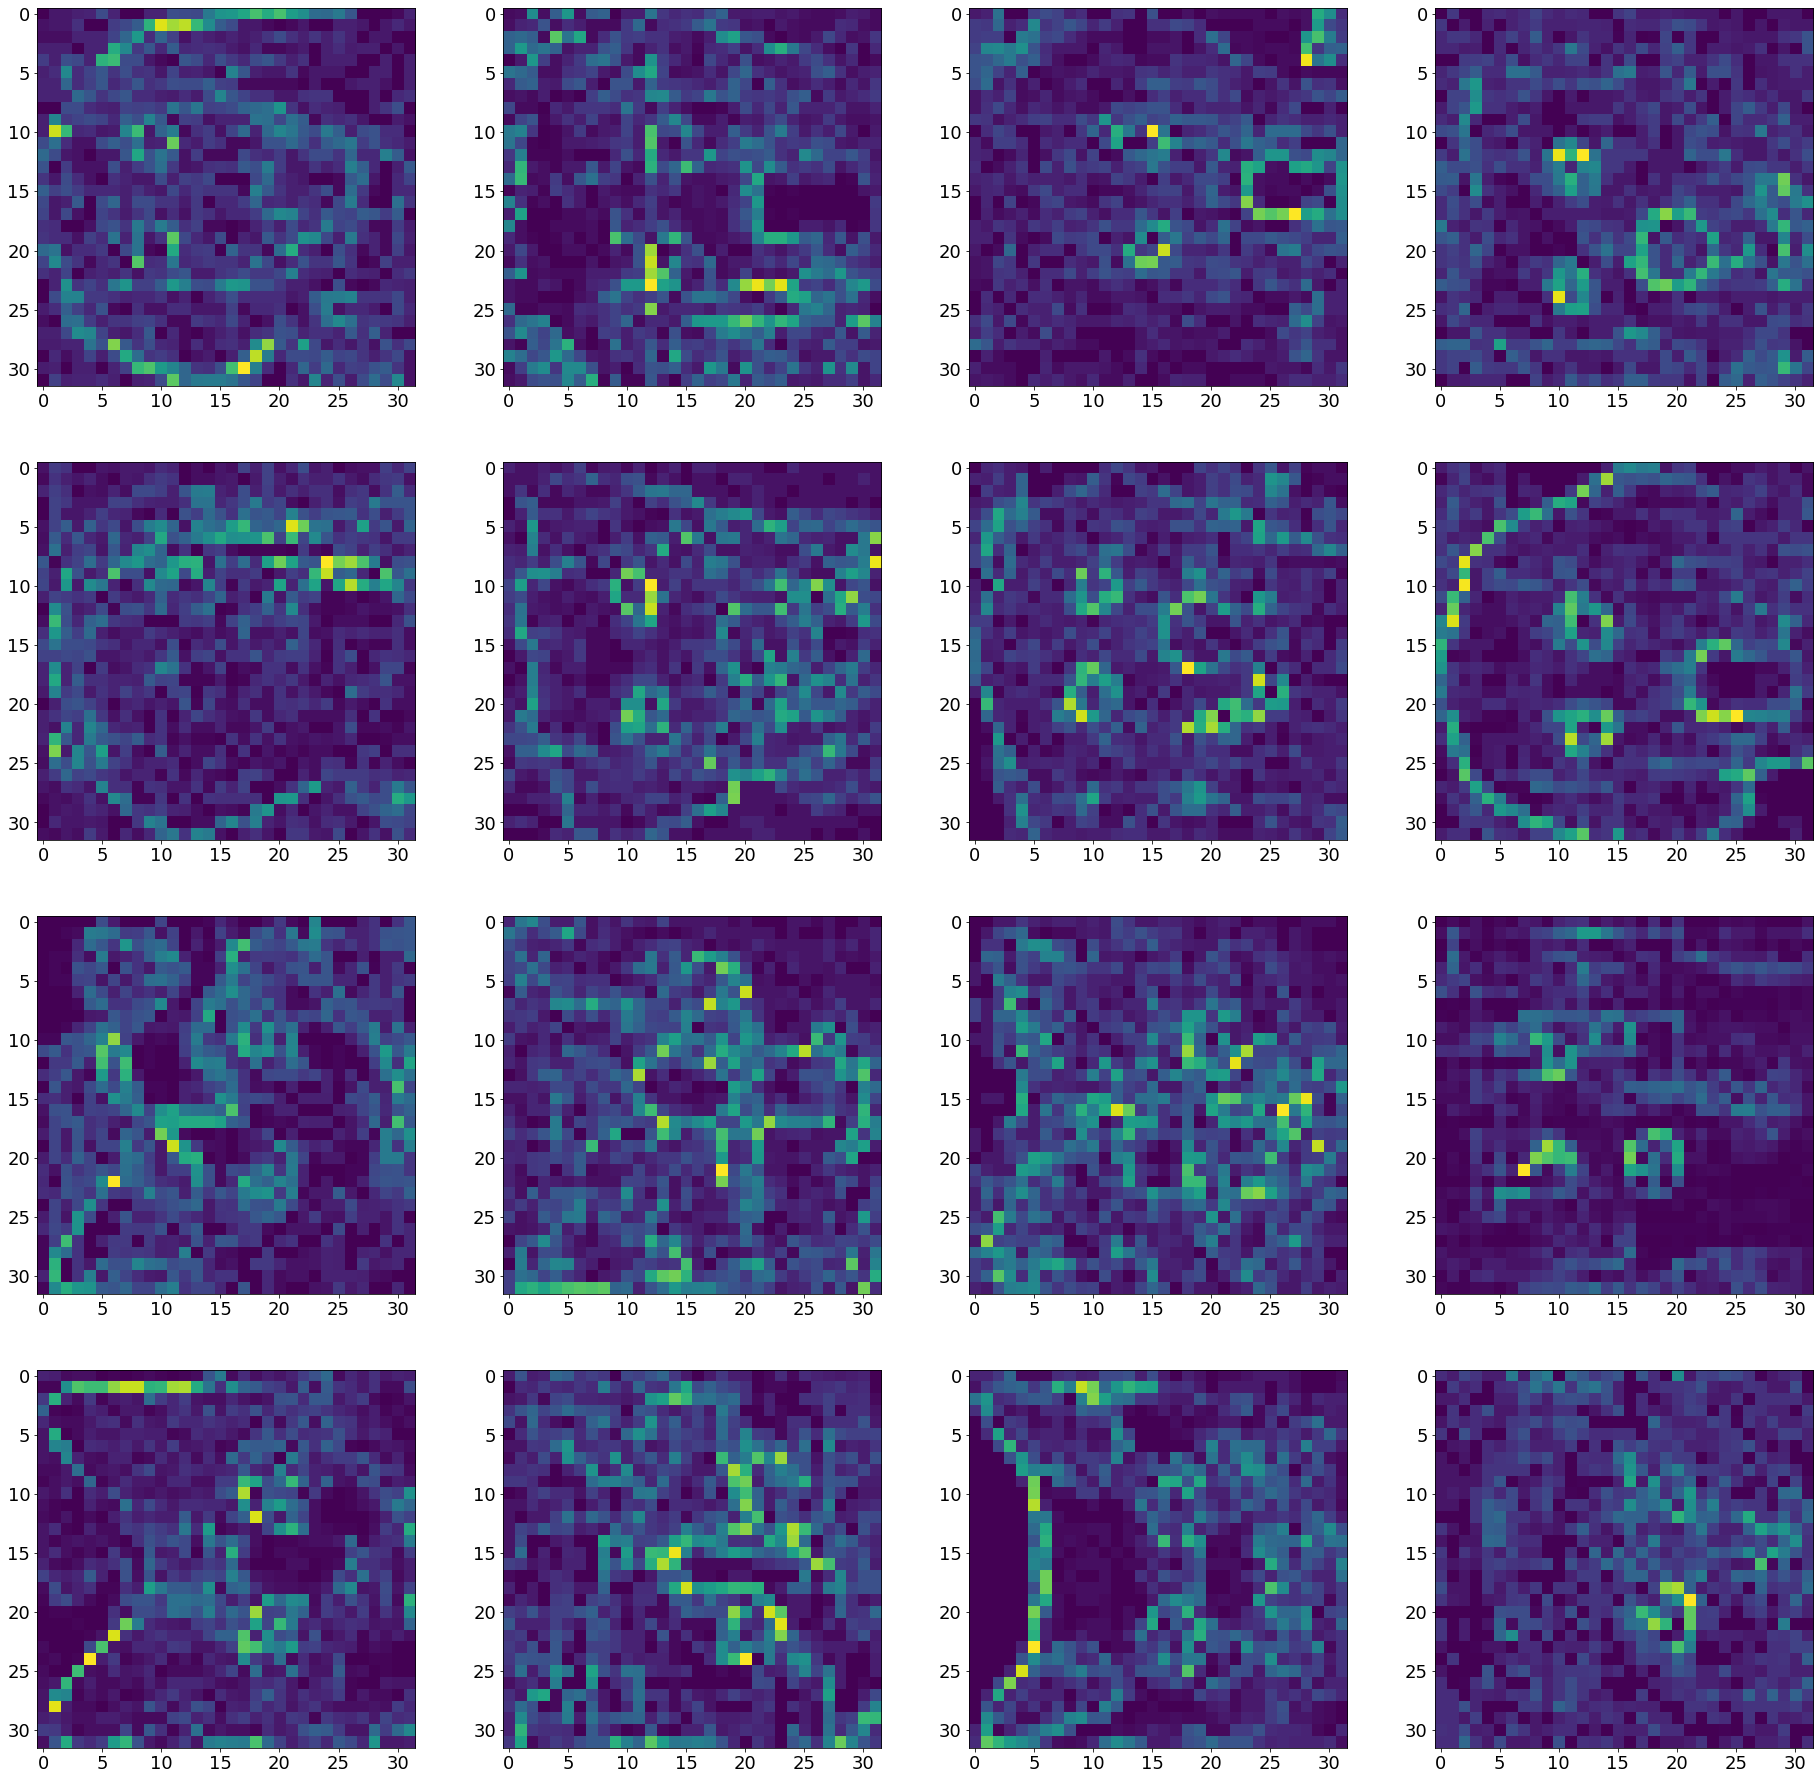

In [20]:
fig = plt.figure(figsize=(32, 32))
for i in range(1, 9):
    # Adding test images to plot
    first_image = dog_wave[:,i-1]
    first_image = np.array(first_image, dtype='float')
    pixels_dog = first_image.reshape((32, 32))
    fig.add_subplot(4, 4, i)
    plt.imshow(pixels_dog, cmap='gray')

for i in range(9, 17):
    # Now adding autoencoder's attempt at recreating test image to the plot
    pixels_cat = cat_wave[:,i-1].reshape((32, 32))
    fig.add_subplot(4, 4, i)
    plt.imshow(pixels_cat, cmap='gray')

In [21]:
CD = np.concatenate((dog_wave,cat_wave),axis=1)

u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
v = vT.T

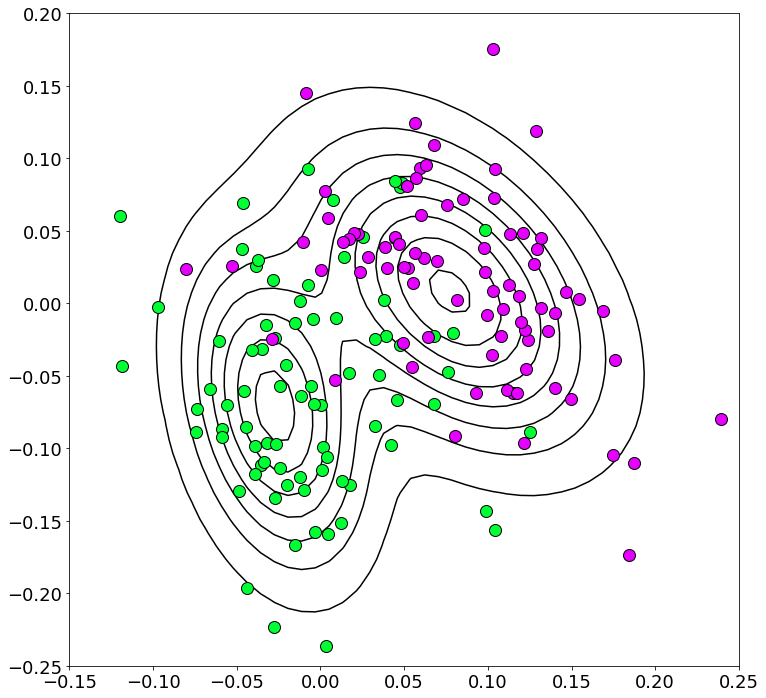

In [12]:
dogcat = v[:,(1,3)]
GMModel = GaussianMixture(n_components=2).fit(dogcat)
AIC = GMModel.aic(dogcat)

plt.plot(v[:80,1],v[:80,3],'ro',MarkerFaceColor=(0,1,0.2),MarkerEdgeColor='k',ms=12)
plt.plot(v[80:,1],v[80:,3],'bo',MarkerFaceColor=(0.9,0,1),MarkerEdgeColor='k',ms=12)

x = np.linspace(-0.15, 0.25)
y = np.linspace(-0.25, 0.2)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = np.exp(GMModel.score_samples(XX))
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z,levels=np.arange(3,32,4),colors='k',linestyles='solid')

plt.show()

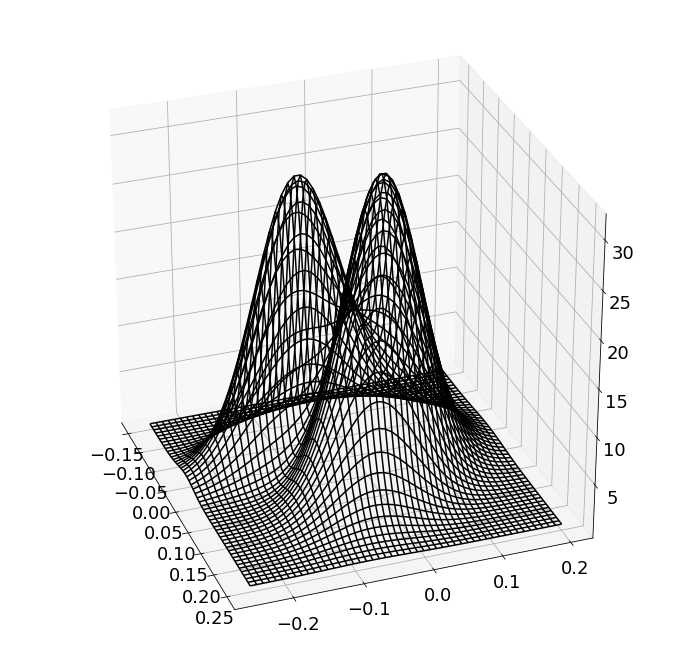

In [13]:
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.view_init(30, -20)
plt.show()

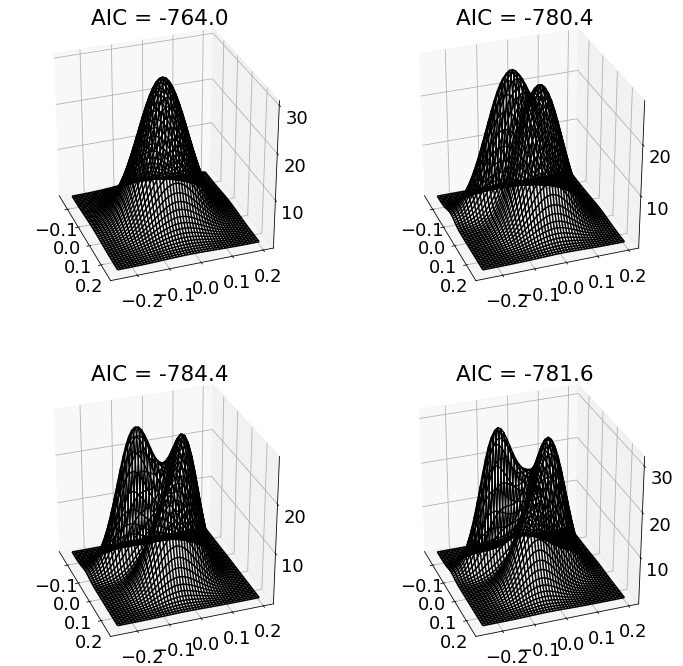

In [14]:
## AIC Scores
AIC = np.zeros(4)
GMModels = [GaussianMixture(k+1,covariance_type='diag',max_iter=500).fit(dogcat)
          for k in range(4)]

fig,axs = plt.subplots(2,2,subplot_kw={'projection': '3d'})
axs = axs.reshape(-1)

for j in range(len(axs)):
    Z = np.exp(GMModels[j].score_samples(XX))
    Z = Z.reshape(X.shape)
    AIC[j] = GMModels[j].aic(dogcat)
    axs[j].plot_wireframe(X, Y, Z, color='black')
    axs[j].view_init(30, -20)
    axs[j].set_title('AIC = {:.4}'.format(AIC[j]))
